In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
import string

In [ ]:
datascience_df = pd.read_csv("sample_data/dataset_overall.csv",parse_dates=True)

#datascience_df = pd.read_csv("sample_data/newyork_post_1_to_100.csv",parse_dates=True)
datascience_df = datascience_df.dropna()
datascience_df['date'] = pd.to_datetime(datascience_df['date'])
month_groups = {month: df_group for month, df_group in datascience_df.groupby(datascience_df['date'].dt.strftime('%Y-%m'))}
df = []
# Save each month's dataset or view it
for month, data in month_groups.items():
    #print(f"\nData for {month}:\n")
    df.append(data)
print(df[0])
#g = datascience_df.groupby(pd.Grouper(key='date', freq='M'))
#dfs = [group for _,group in g]
#print(datascience_df.head())
#datascience_df['date'] = pd.to_datetime(datascience_df['date'])
import re
def simple_clean_text(x):
    x = x.lower()
    x = re.sub('[^a-z]'," ",x)
    x = re.sub(' +',' ',x).strip()
    words = x.split()
    return " ".join(words)
datascience_df['description'] = datascience_df['description'].apply(lambda x: simple_clean_text(x))


                                                  title  \
383    GM Quader doubts ‘flawless’ performance of 12...   
384    Corruption is at everywhere but Bangladesh be...   
385    BNP programme foiled at Uttara, Moyeen Khan r...   
386          This is not the people’s parliament: Rizvi   
387   12th  parliamentary election BNP to investigat...   
...                                                 ...   
2097  Dr Yunus was sentenced by court, AL not respon...   
2098    Shammi, Sadiq Abdullah fail to contest election   
2099  Cast votes on Jan 7 to foil BNP-Jamaat arsonis...   
2100  Say farewell to BNP forever by showing red car...   
2101  BNP to hold mass contact, leaflet distribution...   

                                                   link       date  \
383   https://en.prothomalo.com/bangladesh/politics/... 2024-01-30   
384   https://en.prothomalo.com/bangladesh/politics/... 2024-01-30   
385   https://en.prothomalo.com/bangladesh/politics/... 2024-01-30   
386   https

In [ ]:
import nltk
nltk.download('stopwords')
stop = stopwords.words('english')
#stop.extend(['trump','donald','kamala','harris','joe','biden','melania','ivanka'])
#datascience_df['description_without_stopwords'] = datascience_df['description'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
#docs = datascience_df['description_without_stopwords'][datascience_df['description_without_stopwords'].str.len() > 5] # Filter out documents with less than 5 characters
#print(docs)
#docs = datascience_df['description_without_stopwords']
#docs = datascience_df['title']
df[0]['description_without_stopwords'] = df[0]['description'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
docs = df[0]['description_without_stopwords'][df[0]['description_without_stopwords'].str.len() > 5] # Filter out documents with less than 5 characters

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
%%capture
!pip install bertopic

In [ ]:
from bertopic import BERTopic

In [ ]:
topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(docs)

2025-01-11 06:58:52,094 - BERTopic - Embedding - Transforming documents to embeddings.


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/14 [00:00<?, ?it/s]

2025-01-11 07:00:02,541 - BERTopic - Embedding - Completed ✓
2025-01-11 07:00:02,543 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-01-11 07:00:15,367 - BERTopic - Dimensionality - Completed ✓
2025-01-11 07:00:15,369 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-01-11 07:00:15,421 - BERTopic - Cluster - Completed ✓
2025-01-11 07:00:15,431 - BERTopic - Representation - Extracting topics from clusters using representation models.
2025-01-11 07:00:15,577 - BERTopic - Representation - Completed ✓


In [ ]:
freq = topic_model.get_topic_info(); freq.head(25)

,Topic,Count,Name,Representation,Representative_Docs
0,0,399,0_election_party_said_the,"[election, party, said, the, awami, league, bn...",[The 12th Jatiya Sangsad election take place t...
1,1,23,1_bail_court_filed_cases,"[bail, court, filed, cases, case, fakhrul, pol...",[A court Dhaka granted bail BNP Secretary Gene...


In [ ]:
topic_model.get_topic(0)

[('case', 0.035792858045015204),
 ('court', 0.03360054567457409),
 ('police', 0.03314536122534006),
 ('filed', 0.02991725345443976),
 ('former', 0.02245355873147815),
 ('dhaka', 0.021843174212669545),
 ('station', 0.020133261249745148),
 ('arrested', 0.020054495018112954),
 ('cases', 0.018664822662879107),
 ('bail', 0.018328865130556517)]

In [ ]:
topic_model.visualize_heatmap(n_clusters=20, width=1000, height=1000)

In [ ]:
topic_model.visualize_barchart(top_n_topics=20)

In [ ]:
topic_model.visualize_distribution(probs[1], min_probability=0.005)

In [ ]:
topic_model.visualize_topics()

In [ ]:
!pip install -U sentence-transformers

In [ ]:
!pip install -U umap-learn

In [ ]:
# from sentence_transformers import SentenceTransformer
# from umap import UMAP
# sentence_model = SentenceTransformer("all-MiniLM-L6-v2")
# embeddings = sentence_model.encode(docs, show_progress_bar=False)

# # Train BERTopic
# topic_model = BERTopic().fit(docs, embeddings)

# # Run the visualization with the original embeddings
# topic_model.visualize_documents(docs, embeddings=embeddings)

# # Reduce dimensionality of embeddings, this step is optional but much faster to perform iteratively:
# reduced_embeddings = UMAP(n_neighbors=10, n_components=2, min_dist=0.0, metric='cosine').fit_transform(embeddings)
# topic_model.visualize_documents(docs, reduced_embeddings=reduced_embeddings)

In [ ]:
topics_label= {
    0:"BNP's involvement in politics",
    1:"Seats of Political partys in Election(Election Environment)",
    2:"Upazilla Election Procedure",
    3:"University Politics and Quota Movement",
    4:"Bailment of Political Movement",
    5:"Awami league's political stance",
    6:"Interimn government's cheif advisor",
    7:"Khaleda zia in hospital",
    8:"case_karim_league_fazle",
    9:"India's involvement in Bangladeshi politics",
    10:"Election polling",
    11:"bnp_league_said",
    12:"Labor Movement",
    13:"Corruption of Govt Employees",
    14:"India's BJP and Politics",
    15:"Activists Rally",
    16:"BNP's tareque rahman speech",
    17:"BNP Movement on Election Campaign",
    18:"Jamaat Shibir ban on politics",
    19:"Rohingya issues. Seat with Myanmar",
    20:"Activist's Movement",
    21:"Sheikh hasina's speech about election"

}
topics_label.values()

dict_values(["BNP's involvement in politics", 'Seats of Political partys in Election(Election Environment)', 'Upazilla Election Procedure', 'University Politics and Quota Movement', 'Bailment of Political Movement', "Awami league's political stance", "Interimn government's cheif advisor", 'Khaleda zia in hospital', 'case_karim_league_fazle', "India's involvement in Bangladeshi politics", 'Election polling', 'bnp_league_said', 'Labor Movement', 'Corruption of Govt Employees', "India's BJP and Politics", 'Activists Rally', "BNP's tareque rahman speech", 'BNP Movement on Election Campaign', 'Jamaat Shibir ban on politics', 'Rohingya issues. Seat with Myanmar', "Activist's Movement", "Sheikh hasina's speech about election"])

In [ ]:
from bertopic import BERTopic
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel


cleaned_docs = topic_model._preprocess_text(docs)
vectorizer = topic_model.vectorizer_model
analyzer = vectorizer.build_analyzer()
tokens = [analyzer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]
topics = topic_model.get_topics()
#topics = {k: all_topics[k] for k in range(5) if k in all_topics}
topics.pop(-1, None)
topic_words = [
[word for word, _ in topic_model.get_topic(topic) if word != ""] for topic in topics
]
topic_words = [[words for words, _ in topic_model.get_topic(topic)]
        for topic in range(len(set(topics))-1)][:10]

# Evaluate
coherence_model = CoherenceModel(topics=topic_words,
                          texts=tokens,
                          corpus=corpus,
                          dictionary=dictionary,
                          coherence='c_v')
coherence = coherence_model.get_coherence()
print(coherence)

0.7206200942837465


In [ ]:
from wordcloud import WordCloud

[('case', 0.035792858045015204), ('court', 0.03360054567457409), ('police', 0.03314536122534006), ('filed', 0.02991725345443976), ('former', 0.02245355873147815), ('dhaka', 0.021843174212669545), ('station', 0.020133261249745148), ('arrested', 0.020054495018112954), ('cases', 0.018664822662879107), ('bail', 0.018328865130556517)]
{'case': 0.035792858045015204, 'court': 0.03360054567457409, 'police': 0.03314536122534006, 'filed': 0.02991725345443976, 'former': 0.02245355873147815, 'dhaka': 0.021843174212669545, 'station': 0.020133261249745148, 'arrested': 0.020054495018112954, 'cases': 0.018664822662879107, 'bail': 0.018328865130556517}


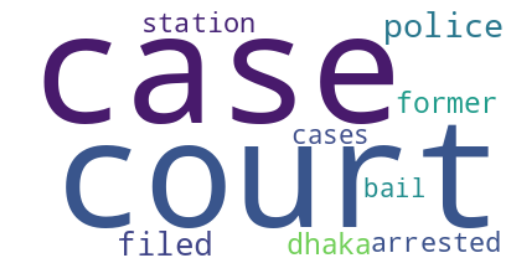

{'quader': 0.041471265592933744, 'said': 0.03624455674562507, 'al': 0.03290714401728169, 'bnp': 0.0287313949437958, 'secretary': 0.027521683404125023, 'general': 0.025080047682563004, 'obaidul': 0.024872996837657767, 'minister': 0.020891046849292733, 'awami': 0.020337594355258972, 'league': 0.020167638698434874}


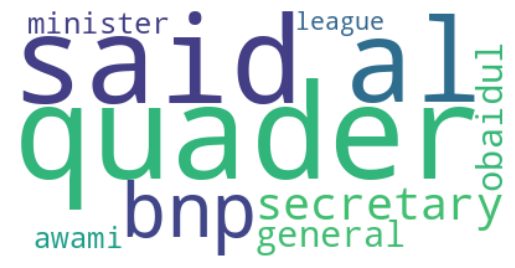

{'khaleda': 0.08866811825399906, 'zia': 0.07230996411744968, 'hospital': 0.06237075346890204, 'treatment': 0.05681611023945055, 'medical': 0.04348620776925629, 'evercare': 0.0430969010825747, 'chairperson': 0.03710907073365955, 'heart': 0.029371815647813056, 'board': 0.02834863431287699, 'liver': 0.027933232464216282}


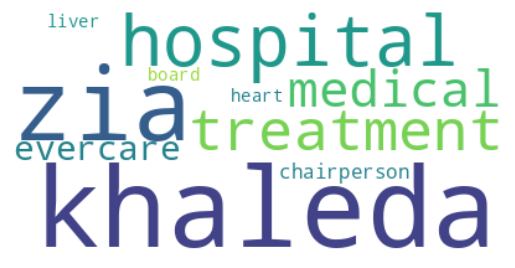

{'fakhrul': 0.05244966223284513, 'government': 0.03274316955346974, 'mirza': 0.03216178915039796, 'bnp': 0.03059548952660144, 'interim': 0.0285525763326105, 'alamgir': 0.022978777810864923, 'said': 0.02271981819747145, 'general': 0.020157407945024026, 'people': 0.019186548447894212, 'islam': 0.019103297082497816}


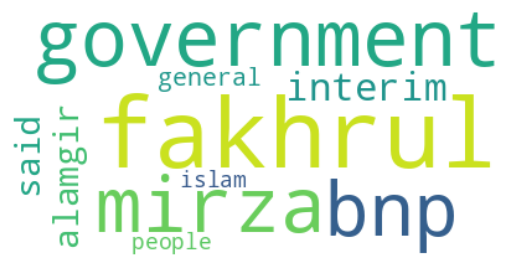

{'prime': 0.03817480135787579, 'sheikh': 0.03485019266469778, 'hasina': 0.033553148288707695, 'minister': 0.033300807220007125, 'people': 0.023347839525411414, 'bangladesh': 0.02185713457923807, 'said': 0.021206269041725446, 'bangabandhu': 0.020877075125588385, 'country': 0.01895094777032148, 'league': 0.018213155440834555}


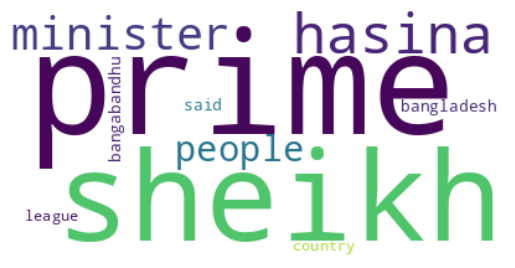

{'seats': 0.05190822867020287, 'independent': 0.04263775769769679, 'candidates': 0.03966161840791371, 'awami': 0.035071102312136664, 'reserved': 0.03491387740191604, 'league': 0.03399370593177408, 'candidate': 0.03065005019757935, 'election': 0.029765550056114646, 'parliament': 0.02811454884935817, 'party': 0.02584196173558168}


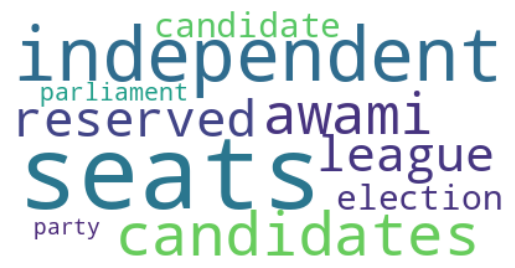

{'trump': 0.09032249944896668, 'biden': 0.057159175303808527, 'harris': 0.045203003131650564, 'campaign': 0.033281274436515754, 'republican': 0.03240706085332843, 'presidential': 0.025888236333369067, 'president': 0.025356686409275336, 'democratic': 0.025064425431675606, 'us': 0.02199142426154654, 'debate': 0.020756457088742197}


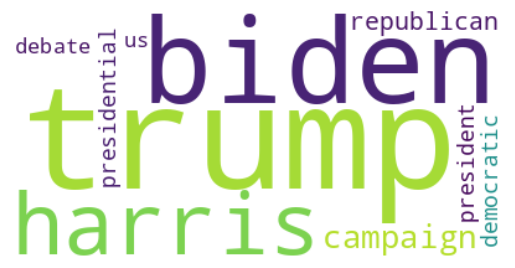

{'election': 0.045253483252544656, 'turnout': 0.042657766781708566, 'phase': 0.04050354203316214, 'voting': 0.03913467867310286, 'upazilas': 0.03692349209158666, 'polling': 0.03512143940084315, 'upazila': 0.032897186791799135, 'ec': 0.03217382302735009, 'voter': 0.029632626762701696, 'cent': 0.029616320775886894}


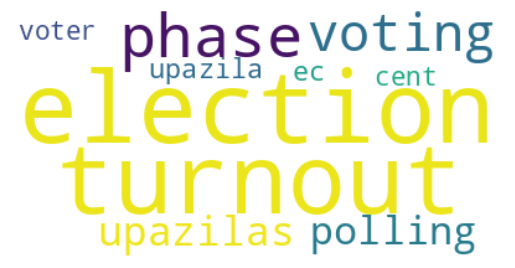

{'student': 0.059972259141836425, 'students': 0.04812234136524148, 'university': 0.04471936693593996, 'politics': 0.0362834775619983, 'buet': 0.0343871710866772, 'bcl': 0.027128648798097413, 'campus': 0.026580384056667728, 'chhatra': 0.024576184496422904, 'discrimination': 0.024576160061188727, 'coordinators': 0.023717333731389265}


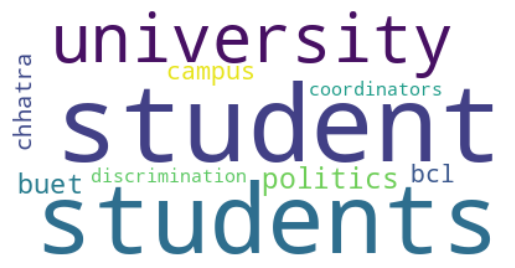

{'upazila': 0.06720872143439789, 'party': 0.03625588965819622, 'polls': 0.03020554446636529, 'candidates': 0.029919695336522677, 'league': 0.029885055766313975, 'awami': 0.029841750671329586, 'election': 0.028313127360587713, 'ministers': 0.02568083061113645, 'leaders': 0.02394163024172971, 'local': 0.02383755965258297}


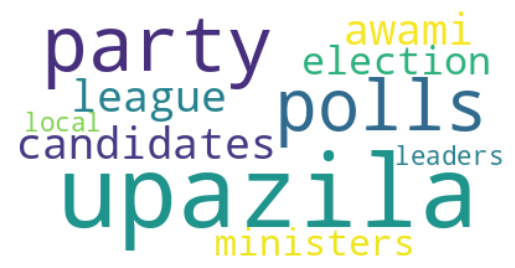

{'japa': 0.07469260634115917, 'jatiya': 0.05631965040245051, 'opposition': 0.05550255818843979, 'gm': 0.051483997110243436, 'party': 0.050991451214972484, 'quader': 0.039627114842740715, 'parliament': 0.039132946785081786, 'chairman': 0.03212646447439181, 'leader': 0.024515447119101648, 'candidates': 0.022477619540986052}


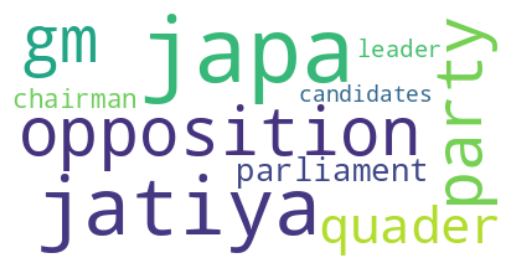

{'bnp': 0.03618253327228028, 'moyeen': 0.03500073057967768, 'election': 0.03437883894538916, 'people': 0.03260321064597787, 'government': 0.030849846905903738, 'khan': 0.025030893385585146, 'said': 0.023593292242576325, 'polls': 0.02265034786093602, 'rizvi': 0.021303822479578866, 'democracy': 0.02110972395485099}


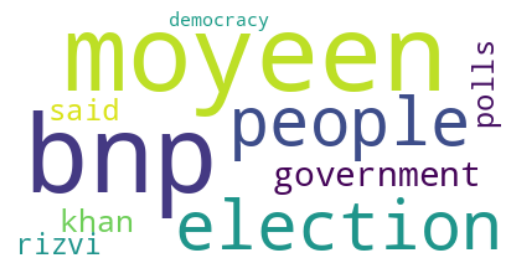

{'tarique': 0.05108613868799039, 'people': 0.033478366712538336, 'rahman': 0.032192665164014214, 'acting': 0.031532879114881326, 'bnp': 0.028411988722762658, 'said': 0.026798136736341672, 'democracy': 0.02384097358984656, 'government': 0.023213418305526885, 'country': 0.02258907240411713, 'chairman': 0.020263866110213104}


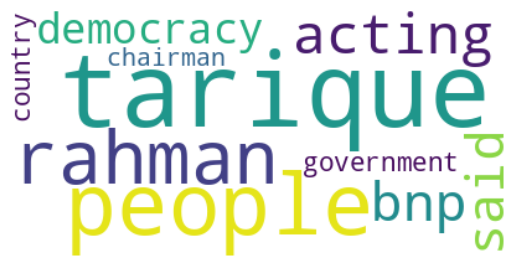

{'jamaat': 0.1101757029259503, 'islami': 0.07208794960725622, 'shibir': 0.06041151308367339, 'ban': 0.04980348083672445, 'banned': 0.03924748478846676, 'banning': 0.029746563387317404, 'chhatra': 0.02820546740305296, 'ministry': 0.025416562460884213, 'government': 0.025264207604579213, 'law': 0.022750027718317474}


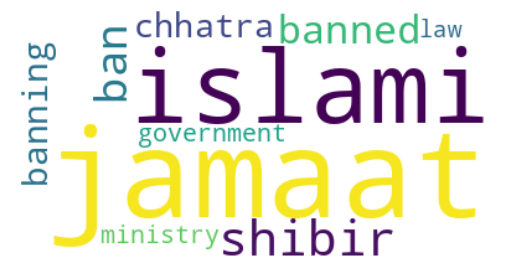

{'ershad': 0.095978088883088, 'raushan': 0.09255194302050442, 'party': 0.06915189960947166, 'japa': 0.06876964971951972, 'gm': 0.0684005751663061, 'chairman': 0.05828140331453775, 'chunnu': 0.05554086359816134, 'jatiya': 0.050491409611542123, 'quader': 0.04551957276813903, 'mujibul': 0.037965318988937256}


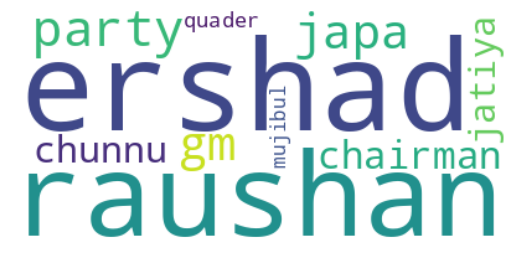

{'meeting': 0.08679467834111265, 'al': 0.0760670395365083, 'release': 0.04989489365502215, 'awami': 0.048425856503751884, 'sheikh': 0.047119677044806796, 'hasina': 0.0466746248959786, 'league': 0.04595776513751954, 'central': 0.044472129528884505, 'requested': 0.04390068568676267, 'prime': 0.04362443785953735}


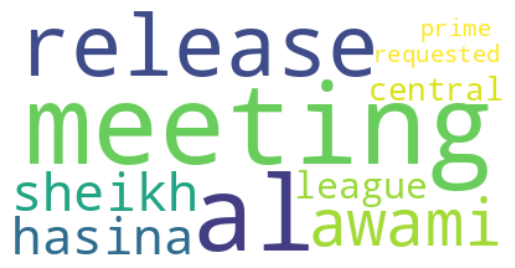

{'hasina': 0.04896155284976401, 'joy': 0.030601489559557094, 'india': 0.027687649048107388, 'sheikh': 0.02429532082175898, 'government': 0.022620959355789748, 'bangladesh': 0.02239869621277974, 'said': 0.017587447704165333, 'country': 0.01724839339280653, 'interim': 0.017005038300834503, 'wazed': 0.016020806345012593}


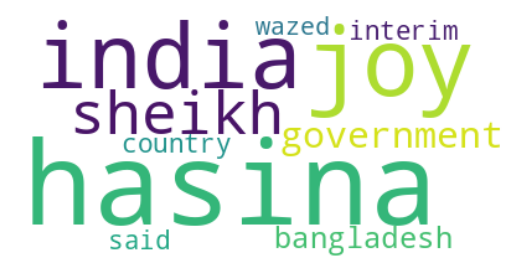

{'rizvi': 0.05851811207055293, 'bnp': 0.03296444881858421, 'ruhul': 0.03243581168624379, 'kabir': 0.031823998723421426, 'people': 0.03153701979278238, 'joint': 0.03003089891991042, 'senior': 0.028920549584852333, 'government': 0.024315885133763582, 'said': 0.02383702460045418, 'nayapaltan': 0.02273441442247478}


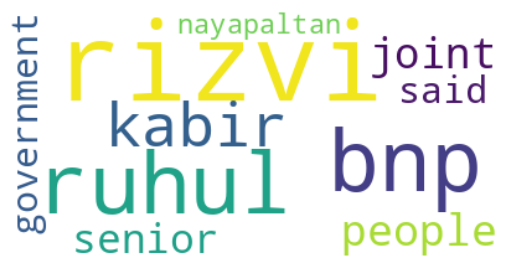

{'modi': 0.09502003897731835, 'bjp': 0.058944212835625065, 'congress': 0.03984661611895699, 'india': 0.039032583929044525, 'hindu': 0.028386391801735654, 'gandhi': 0.02562122941144194, 'opposition': 0.02462620368807549, 'muslims': 0.022205065489916347, 'win': 0.018899639927973656, 'third': 0.01840781745079153}


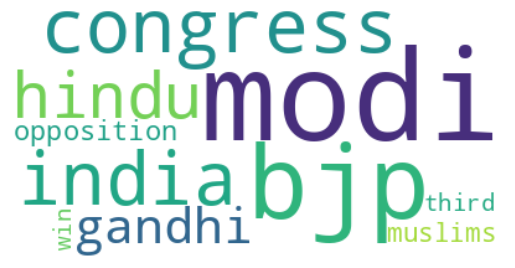

{'flag': 0.08713412953417002, 'black': 0.08022455541886768, 'procession': 0.07248296803735381, 'january': 0.043364730381215744, 'bnp': 0.0391976953269158, 'processions': 0.03906514359523388, 'programme': 0.0371997001617281, 'rally': 0.03204002940801851, 'party': 0.029132794703311503, 'demanding': 0.02763462755532844}


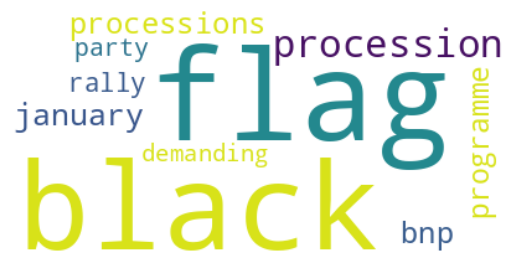

{'labour': 0.08347826018119615, 'sunak': 0.047644550630908444, 'conservatives': 0.04005564060639195, 'britain': 0.03868207484106461, 'starmer': 0.031775033836484314, 'conservative': 0.030574186019822418, 'party': 0.02056624901053079, 'election': 0.018265765009724867, 'british': 0.01825831778323891, 'climate': 0.017602310898808787}


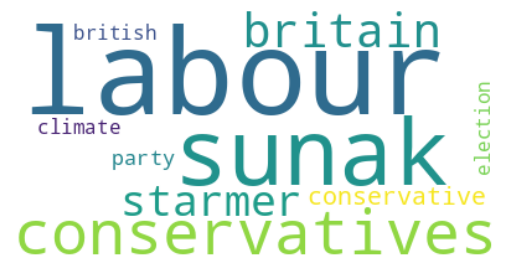

{'bangabandhu': 0.05173777305128605, 'league': 0.044243036763561124, 'awami': 0.037458094295186393, 'anniversary': 0.0273281730498296, 'sheikh': 0.026444424231142648, 'party': 0.023816850218595018, 'day': 0.023589443882077885, 'al': 0.02206460462521795, 'mujibur': 0.022051372760577424, 'nation': 0.018802670700227828}


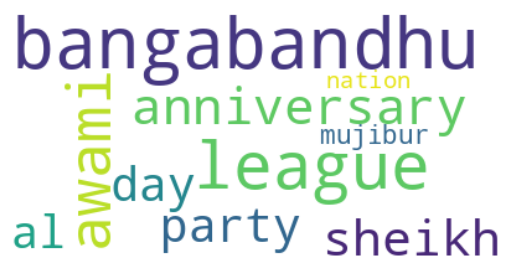

{'parties': 0.05830214100858405, 'reform': 0.04515096441501653, 'political': 0.04500450606196574, 'chief': 0.04409471006006975, 'reforms': 0.042128524884407215, 'commissions': 0.03983362611620795, 'yunus': 0.03896503658276488, 'advisor': 0.03783719717917356, 'adviser': 0.03565910810304015, 'dialogue': 0.035074573721256774}


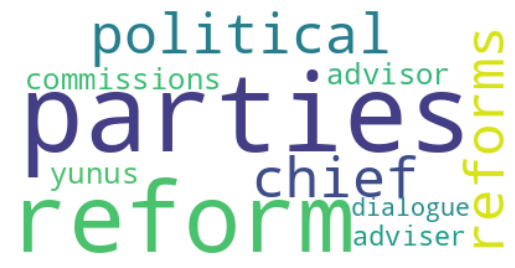

{'adviser': 0.057876861353210456, 'yunus': 0.055870411687812864, 'chief': 0.03841928439141863, 'prof': 0.03162915484617824, 'bangladesh': 0.031180752189511083, 'un': 0.02744813435099594, 'said': 0.02713388670937272, 'interim': 0.022627986266700796, 'security': 0.021829548442119245, 'nations': 0.021820118807997273}


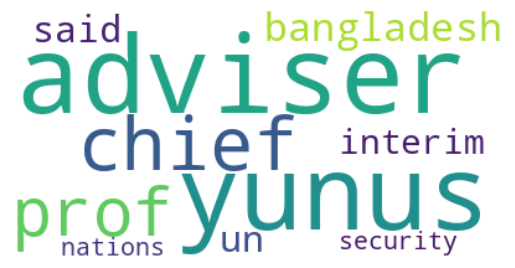

{'rally': 0.15215540525942814, 'bnp': 0.04710538367551791, 'nayapaltan': 0.04008073389698586, 'front': 0.03983987824888943, 'party': 0.034204089602266924, 'central': 0.03365197845410093, 'leaders': 0.030438889441957766, 'naya': 0.03023592947772887, 'pm': 0.029907453762725383, 'office': 0.029585499563076885}


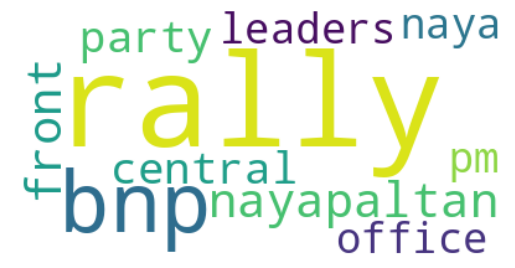

In [ ]:
print(topic_model.get_topic(0))
def create_wordcloud(model, topic):
    text = {word: value for word, value in model.get_topic(topic)}
    print(text)
    wc = WordCloud(background_color="white", max_words=1000)
    wc.generate_from_frequencies(text)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()
for i in range(25):
  create_wordcloud(topic_model, i)

